In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.regularizers as regularizers


DATASET_PATH = "./mnist"

train_csv = os.path.join(DATASET_PATH, "fashion-mnist_train.csv")
test_csv = os.path.join(DATASET_PATH, "fashion-mnist_test.csv")

train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)
train_df.head()
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
classes = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

In [3]:
train_labels = []
train_imgs = []
for idx, row in train_df.iterrows():
    label = row['label']
    img = row.drop('label').values
    img = np.array(img).reshape((28, 28))
    
    train_labels.append(label)
    train_imgs.append(img)
    
train_imgs = tf.convert_to_tensor(train_imgs, tf.float32)
train_labels = tf.convert_to_tensor(train_labels, tf.float32)

In [4]:
test_labels = []
test_imgs = []
for idx, row in test_df.iterrows():
    label = row['label']
    img = row.drop('label').values
    img = np.array(img).reshape((28, 28))
    
    test_labels.append(label)
    test_imgs.append(img)
    
test_imgs = tf.convert_to_tensor(test_imgs, tf.float32)
test_labels = tf.convert_to_tensor(test_labels, tf.float32)

In [5]:
# Assuming train_df and test_df contain your data

# Extracting features (images) and labels for training data
train_imgs = train_df.drop(columns=['label']).values.astype(np.float32) / 255.0  # Normalizing pixel values
train_labels = train_df['label'].values.astype(np.int32)

# Flatten the images
train_imgs = train_imgs.reshape(-1, 28 * 28)  # Reshape from (num_samples, 28, 28) to (num_samples, 784)

# Extracting features (images) and labels for testing data
test_imgs = test_df.drop(columns=['label']).values.astype(np.float32) / 255.0  # Normalizing pixel values
test_labels = test_df['label'].values.astype(np.int32)

# Flatten the images
test_imgs = test_imgs.reshape(-1, 28 * 28)  # Reshape from (num_samples, 28, 28) to (num_samples, 784)

from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
train_imgs, val_imgs, train_labels, val_labels = train_test_split(train_imgs, train_labels, test_size=0.2, random_state=42)

# Ensure the shapes are correct after splitting
print("Training set shape:", train_imgs.shape, train_labels.shape)
print("Validation set shape:", val_imgs.shape, val_labels.shape)
print("Test set shape:", test_imgs.shape, test_labels.shape)

Training set shape: (48000, 784) (48000,)
Validation set shape: (12000, 784) (12000,)
Test set shape: (10000, 784) (10000,)


In [6]:
# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
# # Compile the model with different optimizers
# optimizers = {
#     'Adam': tf.keras.optimizers.Adam(),
#     'AdaDelta': tf.keras.optimizers.Adadelta(),
#     'RMSprop': tf.keras.optimizers.RMSprop()
# }

In [13]:
# Compile the model with Adam optimizer
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_imgs, train_labels, epochs=10, batch_size=32, validation_data=(val_imgs, val_labels), verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_imgs, test_labels, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3090 - accuracy: 0.8880 - val_loss: 0.3347 - val_accuracy: 0.8794
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2946 - accuracy: 0.8921 - val_loss: 0.3497 - val_accuracy: 0.8733
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2876 - accuracy: 0.8939 - val_loss: 0.3334 - val_accuracy: 0.8838
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2835 - accuracy: 0.8952 - val_loss: 0.3324 - val_accuracy: 0.8855
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2732 - accuracy: 0.8973 - val_loss: 0.3230 - val_accuracy: 0.8900
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2720 - accuracy: 0.8983 - val_loss: 0.3343 - val_accuracy: 0.8857
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2631 - accuracy: 0.9011 - val_loss: 0.3246 - val_accuracy:

In [7]:
# Same as above, just replace 'adam' with 'adadelta' in the compile step
model.compile(optimizer='adadelta',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(train_imgs, train_labels, epochs=10, batch_size=32, validation_data=(val_imgs, val_labels), verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_imgs, test_labels, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/10
1500/1500 [==============================] - 13s 7ms/step - loss: 2.2510 - accuracy: 0.1576 - val_loss: 2.0571 - val_accuracy: 0.2867
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 1.9654 - accuracy: 0.3178 - val_loss: 1.8222 - val_accuracy: 0.4706
Epoch 3/10
1500/1500 [==============================] - 10s 6ms/step - loss: 1.7619 - accuracy: 0.4397 - val_loss: 1.6346 - val_accuracy: 0.5780
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 1.5976 - accuracy: 0.5258 - val_loss: 1.4831 - val_accuracy: 0.6288
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 1.4666 - accuracy: 0.5764 - val_loss: 1.3624 - val_accuracy: 0.6526
Epoch 6/10
1500/1500 [==============================] - 10s 6ms/step - loss: 1.3616 - accuracy: 0.6052 - val_loss: 1.2639 - val_accuracy: 0.6672
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 1.2768 - accuracy: 0.6260 - val_loss: 1.1852 - val_acc

In [8]:
# Same as above, just replace 'adam' with 'rmsprop' in the compile step
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(train_imgs, train_labels, epochs=10, batch_size=32, validation_data=(val_imgs, val_labels), verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_imgs, test_labels, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/10
1500/1500 [==============================] - 14s 8ms/step - loss: 0.5471 - accuracy: 0.8082 - val_loss: 0.4562 - val_accuracy: 0.8360
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4261 - accuracy: 0.8480 - val_loss: 0.3673 - val_accuracy: 0.8657
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3966 - accuracy: 0.8613 - val_loss: 0.3799 - val_accuracy: 0.8649
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3814 - accuracy: 0.8679 - val_loss: 0.3531 - val_accuracy: 0.8730
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3695 - accuracy: 0.8724 - val_loss: 0.3701 - val_accuracy: 0.8750
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3627 - accuracy: 0.8753 - val_loss: 0.3532 - val_accuracy: 0.8783
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3564 - accuracy: 0.8791 - val_loss: 0.3751 - val_ac

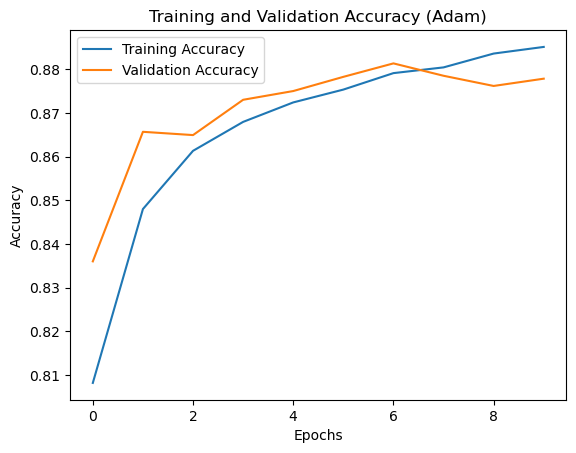

In [9]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Adam)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
""""
With Adam I have got the highest accuracy which is Test Accuracy: %88.  
""""